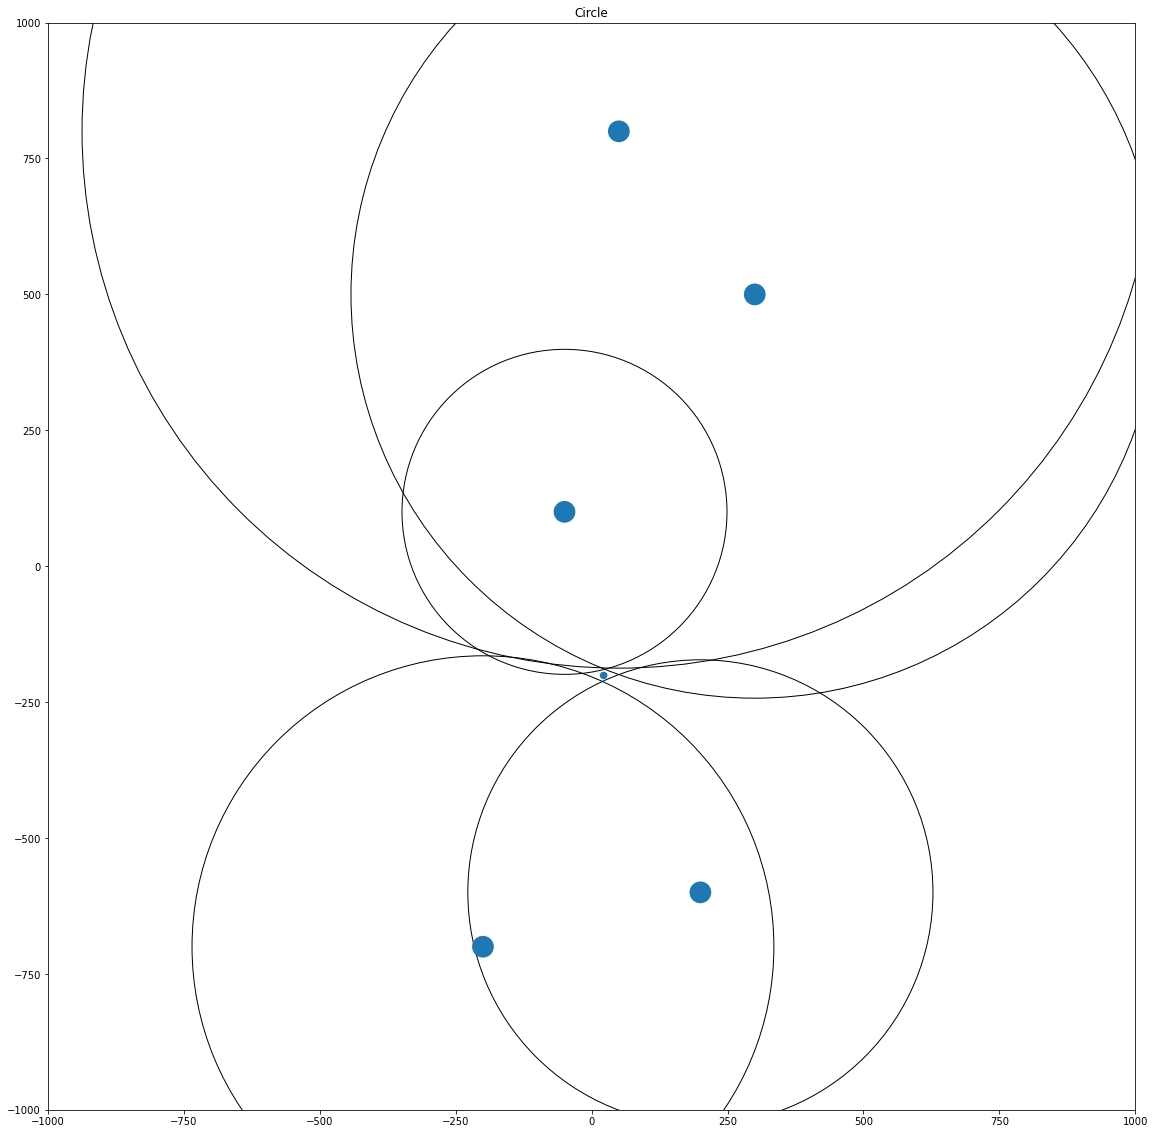

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv, det
import numpy as np
from scipy.optimize import least_squares

cords = np.array([(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)])
dist = np.array([298.9468,742.7760,535.1911,427.8247,987.5056])

f, axes = plt.subplots()
f.set_figwidth(20)
f.set_figheight(20)

plt.title( 'Circle' )
plt.xlim(-1000 , 1000 )
plt.ylim(-1000 , 1000 )

cir_1 = plt.Circle((-50., 100.),298.9468,fill = False )
cir_2 = plt.Circle((300., 500.),742.7760,fill = False )
cir_3 = plt.Circle((-200., -700.),535.1911,fill = False )
cir_4 = plt.Circle((200., -600.),427.8247,fill = False )
cir_5 = plt.Circle((50., 800.),987.5056,fill = False )

 
axes.set_aspect(1)
axes.add_artist(cir_1)
axes.add_artist(cir_2)
axes.add_artist(cir_3)
axes.add_artist(cir_4)
axes.add_artist(cir_5)



axes.add_artist(plt.Circle((-50., 100.), 20))
axes.add_artist(plt.Circle((300., 500.), 20))
axes.add_artist(plt.Circle((-200., -700.), 20))
axes.add_artist(plt.Circle((200., -600.), 20))
axes.add_artist(plt.Circle((50., 800.), 20))
axes.add_artist(plt.Circle((22., -201.), 7))
plt.show()



# Наш гениальный математичный кодик

In [19]:
def coords(x0,y0,tau,dist=dist,cords=cords):
    t=len(dist)
    noise = np.random.normal(0,1,t)
    z,H = np.array([]),np.array([[]])

    for i in range(t):
        z=np.append(z,(dist[i]-(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))))
    #z=np.array(z)+ noise #+ noise
    print(z)
    for i in range(t):
        dfx = (x0-cords[i][0])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        dfy = (y0-cords[i][1])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        H=np.append(H,[[dfx,dfy,tau]])
    H=H.reshape(t,-1)
    predict=inv(H.T@H)@H.T@z
    est_x=predict+np.array([x0,y0,tau])
    return est_x, predict

In [20]:
print(coords(0,0,1),'\n')
print(coords(-30,80,1),'\n')
print(coords(20,-201,1),'\n')
print(coords(-30,-50,1),'\n')

[ 187.14340113  159.68081052 -192.81988893 -204.63083203  185.94462291]
(array([  22.12307669, -201.08630657,   -4.9520953 ]), array([  22.12307669, -201.08630657,   -5.9520953 ])) 

[ 270.66252875  208.64118556 -263.11961645 -290.01929419  263.07478895]
(array([  38.39691115, -209.22211276,    8.04272889]), array([  68.39691115, -289.22211276,    7.04272889])) 

[-10.08556077 -12.07564105 -10.15374503  -9.89781484 -13.94384955]
(array([  20.82558049, -199.94251964,   -9.97374221]), array([  0.82558049,   1.05748036, -10.97374221])) 

[ 147.6193405   101.37129157 -136.67198129 -168.32964243  133.74919446]
(array([  19.08869051, -200.1470345 ,   -6.13170797]), array([  49.08869051, -150.1470345 ,   -7.13170797])) 



In [21]:
def pred_coords(x0,y0,tau,dist=dist,cords=cords):
    t=len(dist)
    noise = np.random.normal(0,1,t)
    z,H = np.array([]),np.array([[]])

    for i in range(t):
        z=np.append(z,(dist[i]-(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))))
    z=np.array(z)+ noise #+ noise
    for i in range(t):
        dfx = (x0-cords[i][0])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        dfy = (y0-cords[i][1])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        H=np.append(H,[[dfx,dfy,tau]])
    H=H.reshape(t,-1)
    predict=inv(H.T@H)@H.T@z
    est_x=predict+np.array([x0,y0,tau])
    return est_x ,predict

In [22]:
print(pred_coords(0,0,1),'\n')
print(pred_coords(-30,80,1),'\n')
print(pred_coords(20,-201,1),'\n')
print(pred_coords(-30,-50,1),'\n')

(array([  21.45083047, -200.84069163,   -5.0762655 ]), array([  21.45083047, -200.84069163,   -6.0762655 ])) 

(array([  38.3948982 , -209.28186424,    8.13092458]), array([  68.3948982 , -289.28186424,    7.13092458])) 

(array([  20.25169374, -200.00219547,   -9.89476814]), array([  0.25169374,   0.99780453, -10.89476814])) 

(array([  22.7103496 , -200.07911538,   -4.85049787]), array([  52.7103496 , -150.07911538,   -5.85049787])) 



## пропадает по 1 маяку

In [6]:
def calc_z(prob, dist, cords):
    x0, y0, tau = prob
    t = len(dist)
    z = np.zeros(t)
    for i in range(t):
        z[i] = dist[i] - np.sqrt((cords[i][0] - x0)**2 + (cords[i][1] - y0)**2)
    #print(z)
    return z

x0,y0,tau = 0,0,1
prob = [x0, y0, tau]
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]

new = []
dist2,cords2 = [],[]
m_vec = []
for i in range(5):
    dist2,cords2=np.copy(dist),np.copy(cords)
    dist2,cords2=np.delete(dist2,i),np.delete(cords2,i,axis=0)

    #print(distt)#
    result = least_squares(calc_z, prob, args=(dist2, cords2))
    m = result.x
    m_vec.append(m)
    print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(m[0], m[1], m[2]))


Оценка координат приемника: (x0= 28.55, y0= -199.95, tau= 1.00)
Оценка координат приемника: (x0= 16.41, y0= -199.68, tau= 1.00)
Оценка координат приемника: (x0= 41.37, y0= -192.49, tau= 1.00)
Оценка координат приемника: (x0= 3.04, y0= -191.50, tau= 1.00)
Оценка координат приемника: (x0= 23.48, y0= -200.34, tau= 1.00)


Оценка координат приемника: (x0= 23.37, y0= -197.40, tau= 0.00)


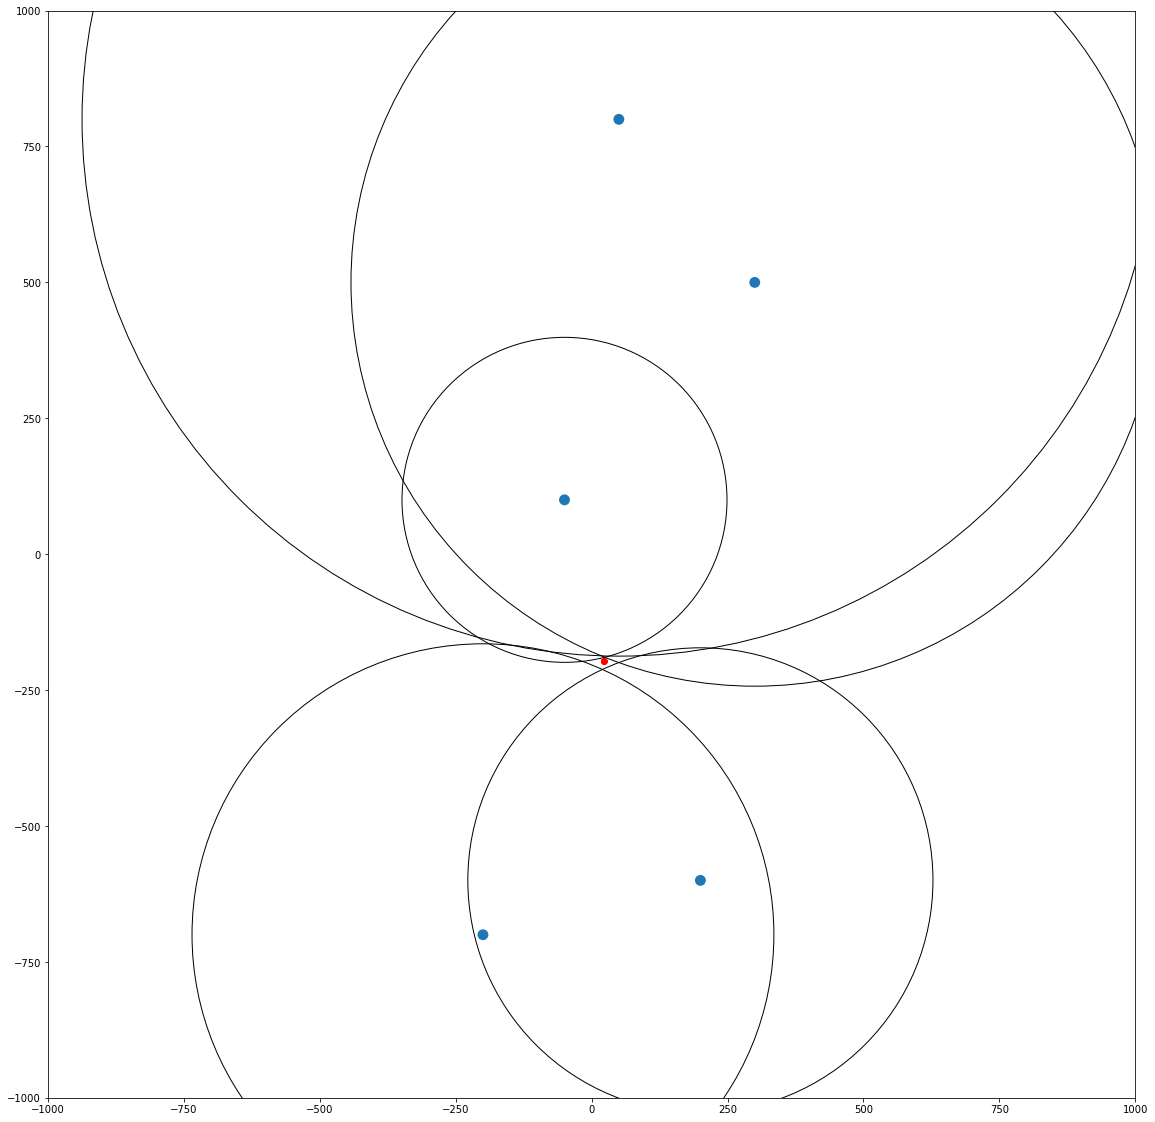

In [7]:
f, axes = plt.subplots()
f.set_figwidth(20)
f.set_figheight(20)

plt.xlim(-1000 , 1000 )
plt.ylim(-1000 , 1000 )
axes.set_aspect(1)
def calc_z(prob, dist, cords):
    x0, y0, tau = prob
    t = len(dist)
    z = np.zeros(t)
    for i in range(t):
        z[i] = dist[i] - np.sqrt((cords[i][0] - x0)**2 + (cords[i][1] - y0)**2)
    return z


x0,y0,tau = 0,0,0
prob = [x0, y0, tau]
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]


result = least_squares(calc_z, prob, args=(dist, cords))


m = result.x

print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(m[0], m[1], m[2]))

for i in range(len(dist)):
    x_c = cords[i][0]
    y_c = cords[i][1]
    cir = plt.Circle((x_c, y_c),dist[i],fill = False )
    axes.add_artist(cir)
    axes.add_artist(plt.Circle((x_c, y_c), 10))
    axes.add_artist(plt.Circle((m[0], m[1]), 5,color='red'))
    #plt.Circle((m[0], m[1]), 20,color='red')


# Дальше два кода одинаковых по сути

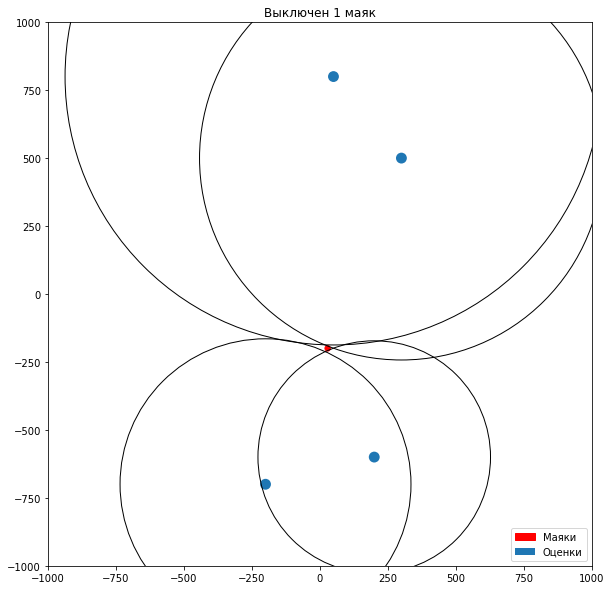

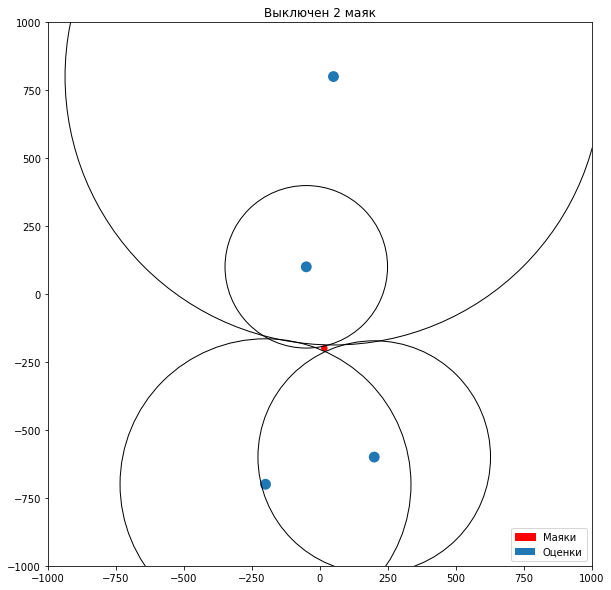

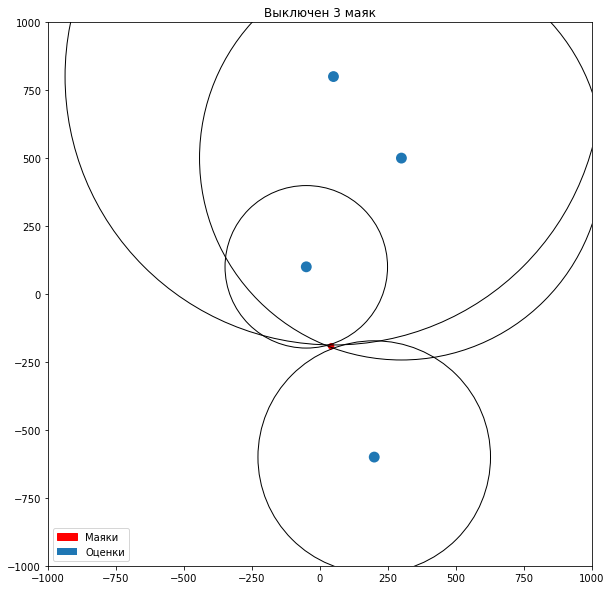

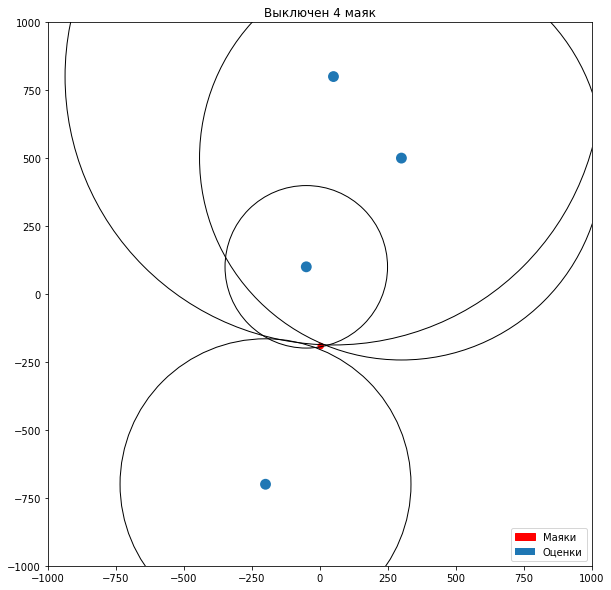

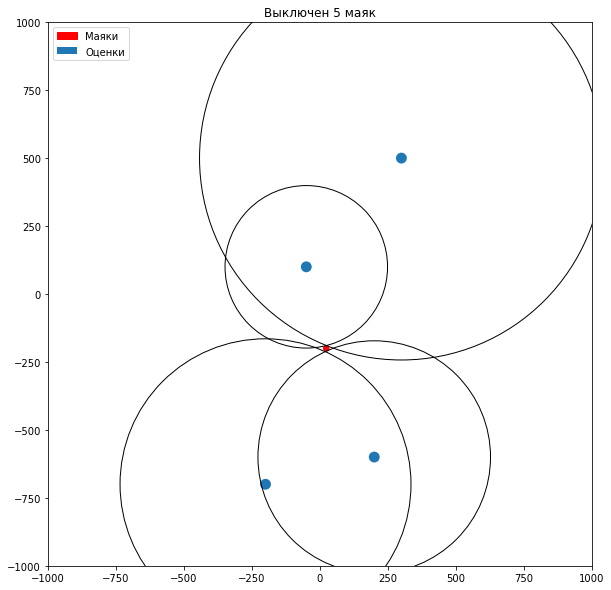

In [8]:
import matplotlib.pyplot as plt

for i in range(len(cords)):
    # Создание фигуры и осей
    f, axes = plt.subplots()
    f.set_figwidth(10)
    f.set_figheight(10)
    axes.add_artist(plt.Circle((m_vec[i][0], m_vec[i][1]), 10, color='red')) #примерные координаты

    axes.set_aspect(1)

    for j in range(len(cords)):
        if j!=i:#маяки
            axes.add_artist(plt.Circle((cords[j][0], cords[j][1]), 20))
            cir = plt.Circle((cords[j][0], cords[j][1]), dist[j], fill=False)
            axes.add_artist(cir)
                # Настройка пределов осей
        axes.set_xlim(-1000, 1000)
        axes.set_ylim(-1000, 1000)


        axes.set_aspect(1)
    axes.set_title('Выключен {} маяк'.format(i+1))
    
    axes.legend(['Маяки', 'Оценки'])
    
    plt.savefig('my_plots {}.png'.format(i))
    
# Показать графики
plt.show()


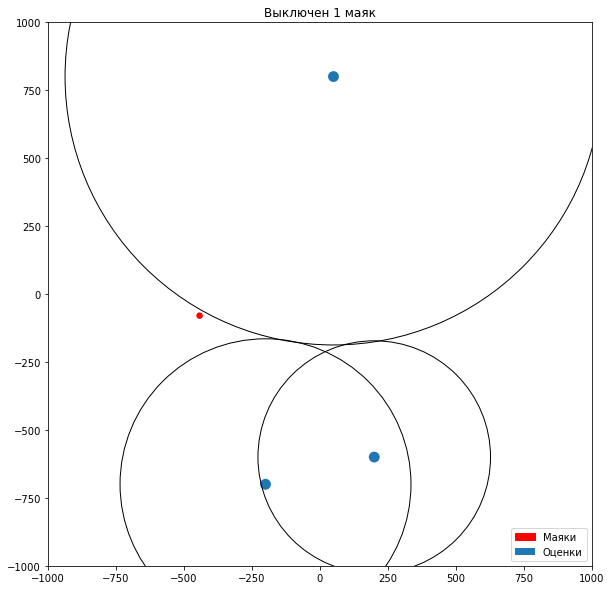

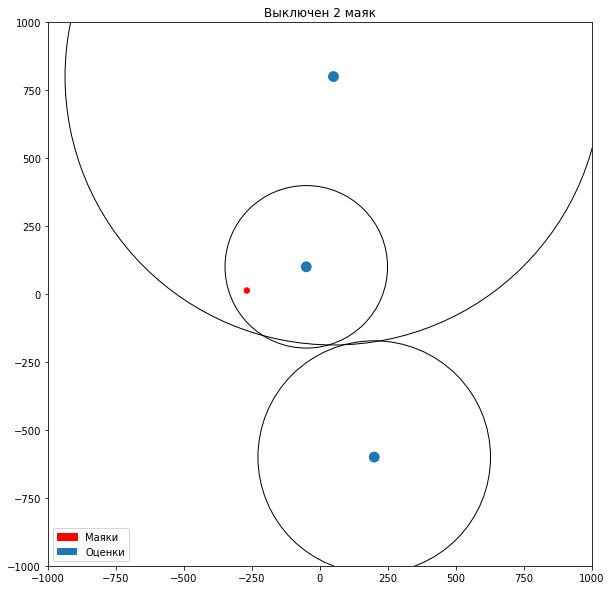

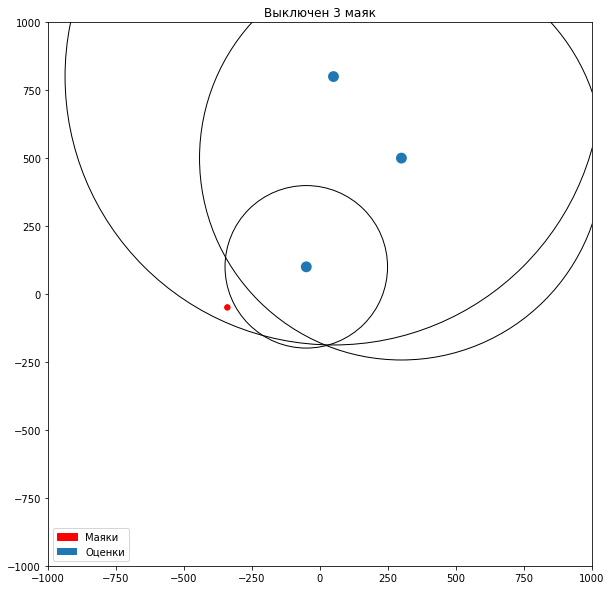

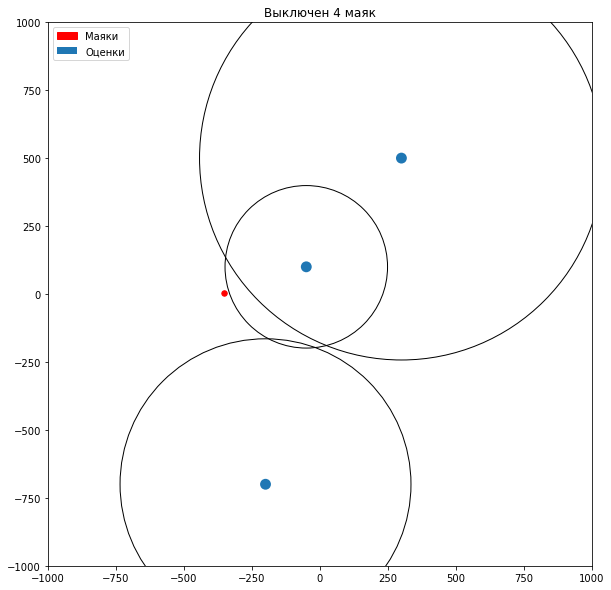

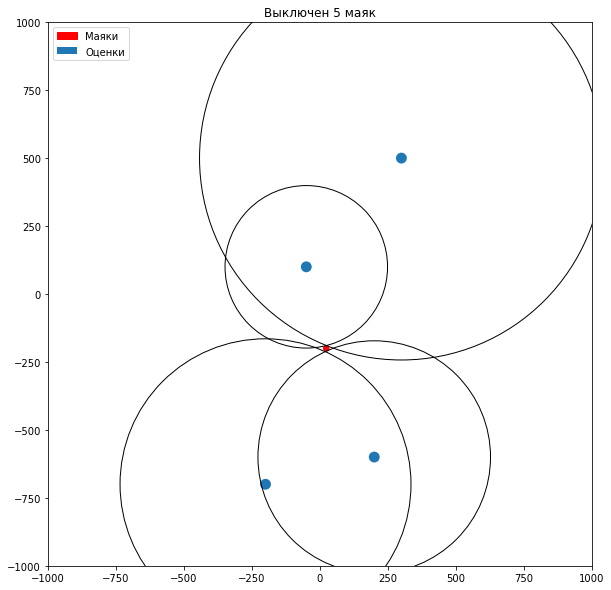

In [101]:
import matplotlib.pyplot as plt

for i in range(len(cords)):
    # Создание фигуры и осей
    f, axes = plt.subplots()
    f.set_figwidth(10)
    f.set_figheight(10)
    axes.add_artist(plt.Circle((m_vec[i][0], m_vec[i][1]), 10, color='red')) #примерные координаты

    axes.set_aspect(1)

    for j in range(len(cords)):
        if j!=i and j!=i+1:#маяки
            axes.add_artist(plt.Circle((cords[j][0], cords[j][1]), 20))
            cir = plt.Circle((cords[j][0], cords[j][1]), dist[j], fill=False)
            axes.add_artist(cir)
                # Настройка пределов осей
        axes.set_xlim(-1000, 1000)
        axes.set_ylim(-1000, 1000)


        axes.set_aspect(1)
    axes.set_title('Выключены {} и {} маяки'.format(i+1,i+2))
    
    axes.legend(['Маяки', 'Оценки'])
    
    plt.savefig('my_plots {}.png'.format(i))
    
# Показать графики
plt.show()


# Выключаем по 1 маяку

Оценка координат приемника: (x0= 28.55, y0= -199.95, tau= 1.00)
Оценка координат приемника: (x0= 16.41, y0= -199.68, tau= 1.00)
Оценка координат приемника: (x0= 41.37, y0= -192.49, tau= 1.00)
Оценка координат приемника: (x0= 3.04, y0= -191.50, tau= 1.00)
Оценка координат приемника: (x0= 23.48, y0= -200.34, tau= 1.00)


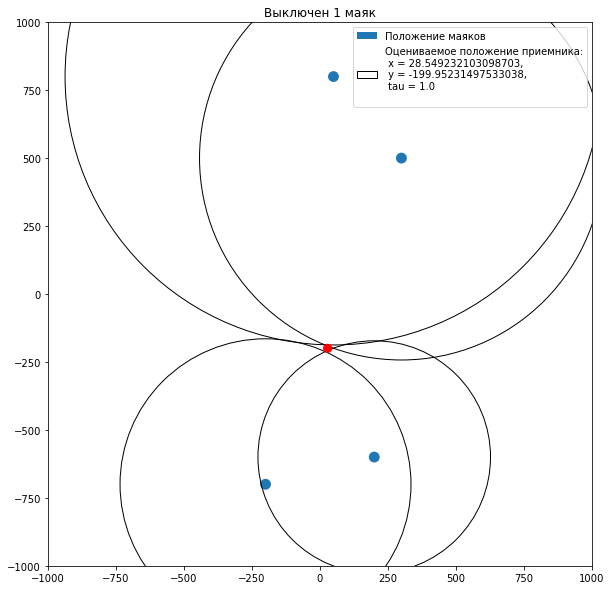

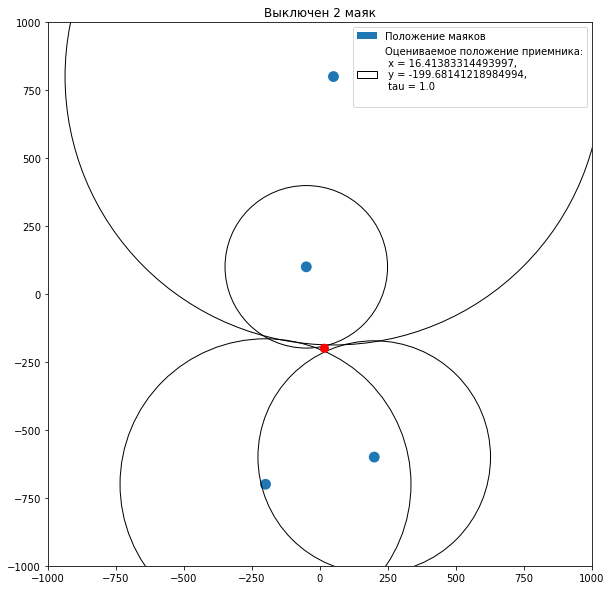

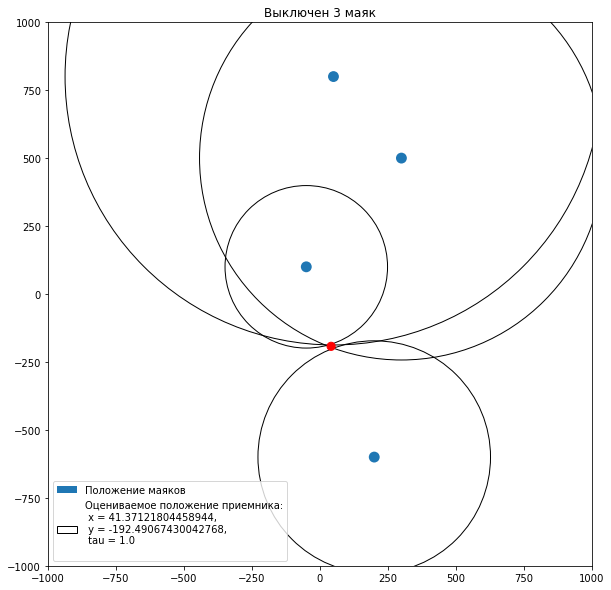

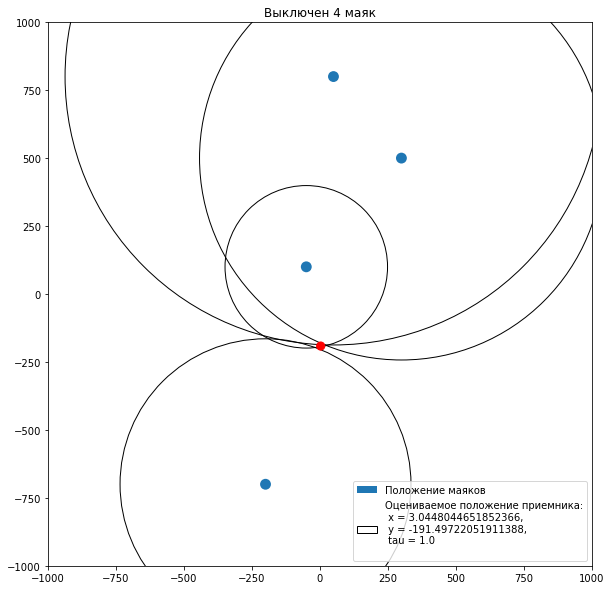

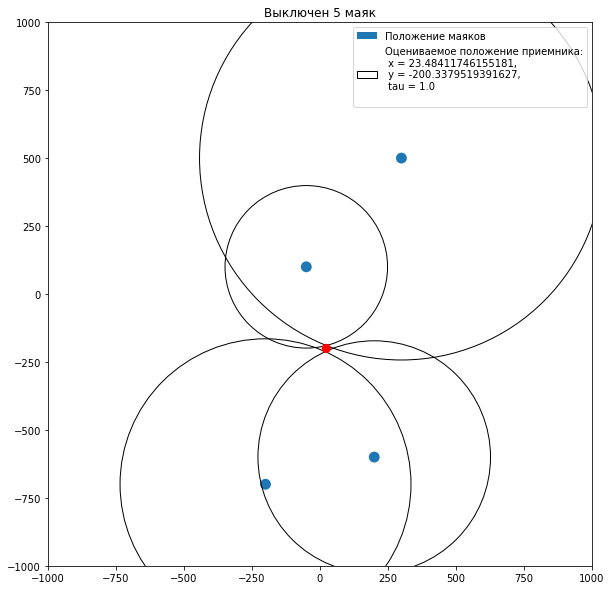

In [9]:
def calc_z(prob, dist, cords):
    x0, y0, tau = prob
    t = len(dist)
    z = np.zeros(t)
    for i in range(t):
        z[i] = dist[i] - np.sqrt((cords[i][0] - x0)**2 + (cords[i][1] - y0)**2)
    #print(z)
    return z

x0,y0,tau = 0,0,1
prob = [x0, y0, tau]
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]

new = []
dist2,cords2 = [],[]
m_vec = []
for i in range(5):
    dist2,cords2=np.copy(dist),np.copy(cords)
    dist2,cords2=np.delete(dist2,i),np.delete(cords2,i,axis=0)

    #print(distt)#
    result = least_squares(calc_z, prob, args=(dist2, cords2))
    m = result.x
    m_vec.append(m)
    print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(m[0], m[1], m[2]))

for i in range(len(cords)):
    f, axes = plt.subplots()
    f.set_figwidth(10)
    f.set_figheight(10)
    axes.set_xlim(-1000, 1000)
    axes.set_ylim(-1000, 1000)
    axes.set_aspect(1)

    for j in range(len(cords)):
        if j!=i:#маяки
            axes.add_artist(plt.Circle((cords[j][0], cords[j][1]), 20))
            cir = plt.Circle((cords[j][0], cords[j][1]), dist[j], fill=False)
            axes.add_artist(cir)
                    # Настройка пределов осей
    
    axes.add_artist(plt.Circle((m_vec[i][0], m_vec[i][1]), 15, color='red')) #примерные координаты

    axes.set_title('Выключен {} маяк'.format(i+1))
    axes.legend(['Положение маяков','Оцениваемое положение приемника:\n x = {},\n y = {},\n tau = {}\n'.format(m_vec[i][0],m_vec[i][1],m_vec[i][2])])

    plt.savefig('my_plots_scipy {}.png'.format(i))

# Показать графики
    plt.show()





[742.776  535.1911 427.8247 987.5056]
Оценка координат приемника: (x0= 17.27, y0= -199.33, tau= -5.91)
[298.9468 535.1911 427.8247 987.5056]
Оценка координат приемника: (x0= 37.47, y0= -198.35, tau= -6.63)
[298.9468 742.776  427.8247 987.5056]
Оценка координат приемника: (x0= 22.63, y0= -200.80, tau= -4.82)
[298.9468 742.776  535.1911 987.5056]
Оценка координат приемника: (x0= 20.00, y0= -200.54, tau= -3.93)
[298.9468 742.776  535.1911 427.8247]
Оценка координат приемника: (x0= 21.75, y0= -203.59, tau= -2.52)


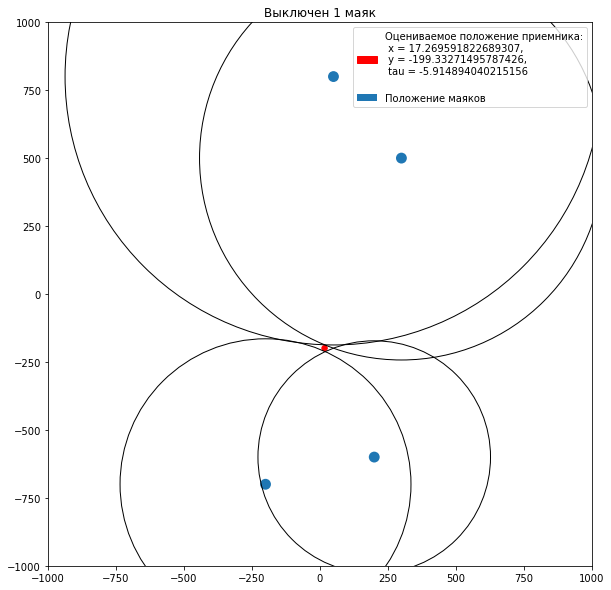

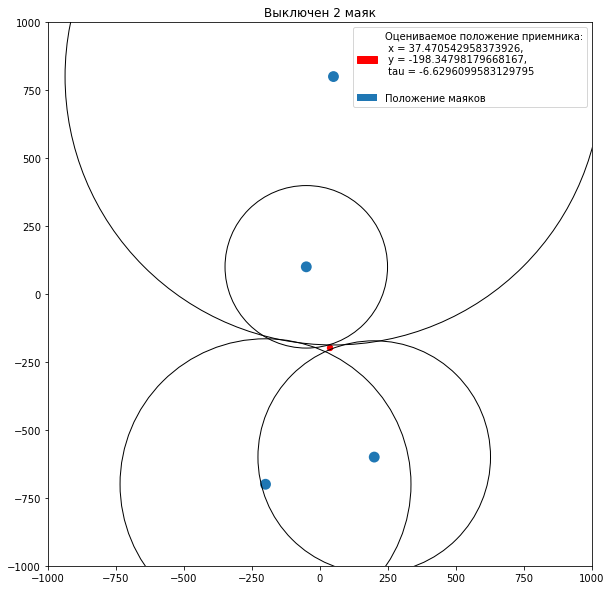

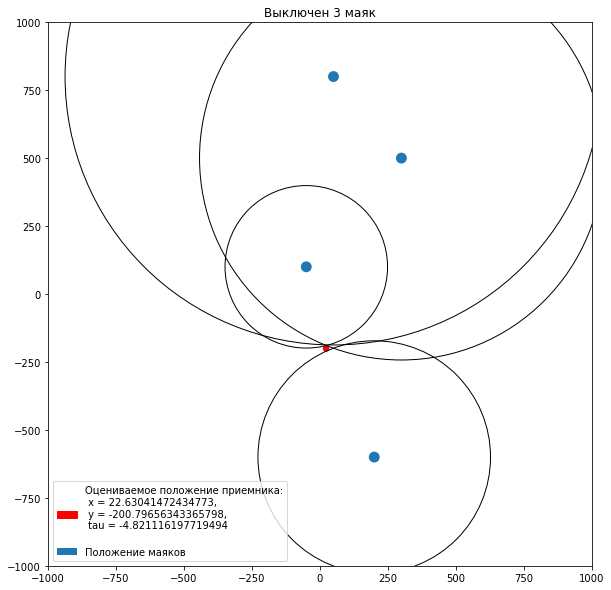

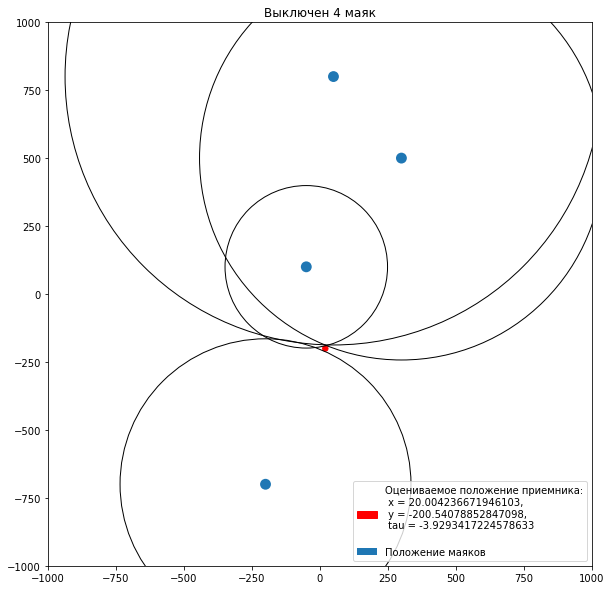

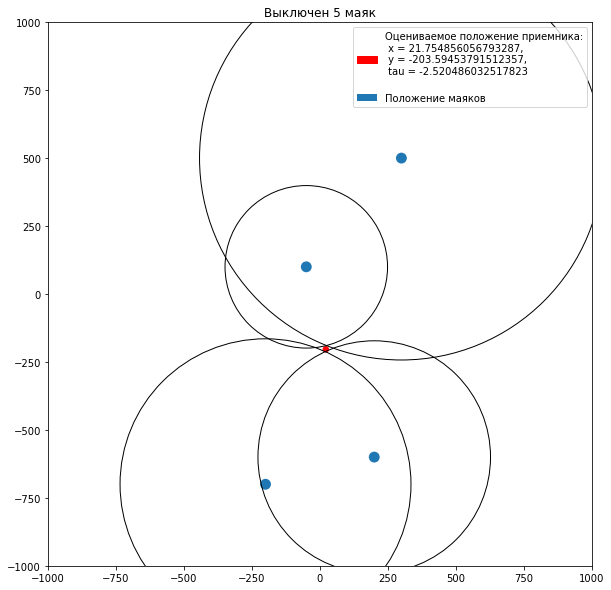

0

In [10]:
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]
x0,y0,tau = 1,1,1
dist2,cords2 = [],[]
est_vec = []

def draw(est_vec=est_vec,cords=cords,dist=dist):    
    for i in range(len(cords)):
        f, axes = plt.subplots()
        f.set_figwidth(10)
        f.set_figheight(10)
        axes.add_artist(plt.Circle((est_vec[i][0], est_vec[i][1]), 10, color='red')) #примерные координаты
        axes.set_xlim(-1000, 1000)
        axes.set_ylim(-1000, 1000)
        axes.set_aspect(1)

        for j in range(len(cords)):
            if j!=i:#маяки
                axes.add_artist(plt.Circle((cords[j][0], cords[j][1]), 20))
                cir = plt.Circle((cords[j][0], cords[j][1]), dist[j], fill=False)
                axes.add_artist(cir)
                    # Настройка пределов осей
        axes.set_title('Выключен {} маяк'.format(i+1))

        axes.legend(['Оцениваемое положение приемника:\n x = {},\n y = {},\n tau = {}\n'.format(est_vec[i][0],est_vec[i][1],est_vec[i][2]),'Положение маяков'])

        plt.savefig('my_plots_my_func {}.png'.format(i))

    # Показать графики
    plt.show()
    return 0


def pred_coords(x0,y0,tau,dist,cords):
    t=len(dist)
    noise = np.random.normal(0,1,t)
    z,H = np.array([]),np.array([[]])

    for i in range(t):
        z=np.append(z,(dist[i]-(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))))
    z=np.array(z)+ noise #+ noise
    for i in range(t):
        dfx = (x0-cords[i][0])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        dfy = (y0-cords[i][1])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        H=np.append(H,[[dfx,dfy,tau]])
    H=H.reshape(t,-1)
    predict=inv(H.T@H)@H.T@z
    m=predict+np.array([x0,y0,tau])
    return m ,predict


for i in range(len(dist)):
    dist2,cords2=np.copy(dist),np.copy(cords)
    dist2,cords2=np.delete(dist2,i),np.delete(cords2,i,axis=0)
    print(dist2)
    est_n, pred = pred_coords(x0,y0,tau,dist2,cords2) #ТУТ Я ХЗ КАК НАДО
    est_vec.append(est_n)
    #print(est_n,pred)
    print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(est_n[0], est_n[1], est_n[2]))


draw()

#print(predict)

In [14]:
dist = np.array([ 298.9468,742.7760, 535.1911,427.8247, 987.5056])
cords = [(-50, 100), (300, 500), (-200, -700), (200, -600), (50, 800)]
x0,y0,tau = 0,0,1
#dist2,cords2 = [],[]
est_vec = []

def draw(est_vec=est_vec, cords=cords2, dist=dist2):    
    for i in range(len(cords)):
        f, axes = plt.subplots()
        f.set_figwidth(10)
        f.set_figheight(10)
        axes.add_artist(plt.Circle((est_vec[i][0], est_vec[i][1]), 10, color='red')) #примерные координаты
        axes.set_xlim(-1000, 1000)
        axes.set_ylim(-1000, 1000)
        axes.set_aspect(1)
        
        for j in range(len(cords)):
            print('a')
            axes.add_artist(plt.Circle((cords[j][0], cords[j][1]), 20))
            cir = plt.Circle((cords[j][0], cords[j][1]), dist[j], fill=False)
            axes.add_artist(cir)
                    # Настройка пределов осей
        axes.set_title('Выключен {} маяк'.format(i+1))

        axes.legend(['Оцениваемое положение приемника:\n x = {},\n y = {},\n tau = {}\n'.format(est_vec[i][0],est_vec[i][1],est_vec[i][2]),'Положение маяков'])

        plt.savefig('my_plots_my_func {}.png'.format(i))

    # Показать графики
    plt.show()
    return 0


def pred_coords(x0,y0,tau,dist,cords):
    t=len(dist)
    noise = np.random.normal(0,1,t)
    z,H = np.array([]),np.array([[]])

    for i in range(t):
        z=np.append(z,(dist[i]-(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))))
    z=np.array(z)+ noise #+ noise
    for i in range(t):
        dfx = (x0-cords[i][0])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        dfy = (y0-cords[i][1])/(np.sqrt((cords[i][0]-x0)**2+(cords[i][1]-y0)**2))
        H=np.append(H,[[dfx,dfy,tau]])
    print(H)
    H=H.reshape(t,-1)
    predict=inv(H.T@H)@H.T@z
    m=predict+np.array([x0,y0,tau])
    return m ,predict


off = np.array([[1,2],[1,3],[1,4],[1,5],[2,3],[2,4],[2,5],[3,4],[3,5],[4,5]])-1
#print("dist = ", dist)
#print("cords = ", cords)
for i in range(len(off)):
    dist2 = np.array([])
    cords2 = np.array([])
    for j in range(len(dist)):
        if j != off[i][0] and j != off[i][1]:
            dist2 = np.append(dist2, dist[j])
            cords2 = np.append(cords2, cords[j])
            
        cords2 = cords2.reshape(-1, 2)
        
        
        est_n, pred = pred_coords(x0,y0,tau,dist2,cords2) #ТУТ Я ХЗ КАК НАДО
        est_vec.append(est_n)
        print("Оценка координат приемника: (x0= {:.2f}, y0= {:.2f}, tau= {:.2f})".format(est_n[0], est_n[1], est_n[2]))

#print(est_vec)
        draw()

#print(predict)

[]


ValueError: cannot reshape array of size 0 into shape (0,newaxis)